In [25]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn import ensemble 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display
%matplotlib inline
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100

## Load the data
### Has had some preprocessing already, plus new features added from other datasets

In [2]:
violations_df = pd.read_csv('violations_all.csv', index_col=0)
display(violations_df)

,crit_violations,non_crit_violations,earliest_inspection,latest_inspection,second_latest_inspection,zipcode,boro,cuisine,address,num_inspections,crit_violations_recent_inspect,non_crit_violations_recent_inspect,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,crit_v_2plus,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license
30075445,8.0,4.0,2013-08-14,2016-02-18,2015-02-09,10462,BRONX,Bakery,1007 MORRIS PARK AVE,5,1,1,7.0,3.0,4,1.750,0.750000,374,918,0,39.333333,60.666667,1,2,4.800000,0,0,2,5,3,1,24.0,24.0,6.0,20.0,3,True,False
30112340,14.0,10.0,2014-06-05,2016-10-27,2016-10-03,11225,BROOKLYN,Hamburgers,469 FLATBUSH AVENUE,9,1,1,13.0,9.0,8,1.625,1.125000,24,875,0,47.000000,58.000000,3,4,3.400000,0,0,5,7,23,3,27.0,18.0,15.0,4.0,0,True,False
30191841,4.0,7.0,2013-07-22,2016-05-31,2015-09-21,10019,MANHATTAN,Irish,351 WEST 57 STREET,5,1,1,3.0,6.0,4,0.750,1.500000,253,1044,0,77.333333,68.666667,1,0,3.500000,0,0,16,13,172,72,32.0,33.0,104.0,26.0,11,True,True
40356018,1.0,7.0,2013-06-05,2016-05-16,2015-06-05,11224,BROOKLYN,American,2780 STILLWELL AVENUE,4,1,1,0.0,6.0,3,0.000,2.000000,346,1076,0,58.333333,56.666667,0,0,4.800000,0,0,0,9,24,4,13.0,8.0,9.0,3.0,3,True,False
40356151,13.0,5.0,2014-04-11,2016-05-14,2015-05-29,11369,QUEENS,American,8825 ASTORIA BOULEVARD,7,1,1,12.0,4.0,6,2.000,0.666667,351,764,0,63.666667,67.666667,1,4,3.800000,0,0,0,3,6,0,8.0,12.0,4.0,20.0,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50060427,10.0,4.0,2017-03-07,2017-04-06,2017-03-20,11217,BROOKLYN,Bagels/Pretzels,73 LAFAYETTE AVE,3,2,1,8.0,3.0,2,4.000,1.500000,17,30,1,49.333333,88.666667,5,2,4.100000,0,0,3,14,14,2,83.0,31.0,13.0,13.0,4,True,True
50060496,7.0,4.0,2017-02-27,2017-03-31,2017-02-27,11232,BROOKLYN,Delicatessen,4102 3RD AVE,2,3,1,4.0,3.0,1,4.000,3.000000,32,32,1,46.000000,67.333333,4,1,4.800000,0,0,0,1,9,4,4.0,32.0,8.0,3.0,2,False,False
50060695,7.0,4.0,2017-04-04,2017-04-10,2017-04-04,11432,QUEENS,Pizza,16417 JAMAICA AVE,2,1,1,6.0,3.0,1,6.000,3.000000,6,6,0,51.333333,55.000000,0,0,3.792806,1,0,0,0,0,0,1.0,4.0,0.0,3.0,0,False,False
50060807,2.0,2.0,2017-03-09,2017-03-20,2017-03-09,10467,BRONX,Chinese,2861 WHITE PLAINS RD,2,1,2,1.0,0.0,1,1.000,0.000000,11,11,0,42.000000,47.333333,1,0,3.700000,0,0,3,5,55,14,62.0,24.0,28.0,9.0,14,True,False


## Drop columns that we know we don't want during training

In [24]:
(violations_df['crit_violations_recent_inspect'] > 1).mean()

0.34536244228269153

In [5]:
violations_df.columns

Index(['crit_violations', 'non_crit_violations', 'earliest_inspection',
       'latest_inspection', 'second_latest_inspection', 'zipcode', 'boro',
       'cuisine', 'address', 'num_inspections',
       'crit_violations_recent_inspect', 'non_crit_violations_recent_inspect',
       'crit_violations_train', 'non_crit_violations_train',
       'num_inspections_train', 'average_crit_v_train',
       'average_non_crit_v_train', 'time_since_last_inspection',
       'time_since_first_inspection', 'crit_v_2plus', '3-day temp',
       '3-day humidity', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps',
       'rating', 'rating_null', 'rating_null_zip', 'food_poisoning_complaints',
       'food_establishment_complaints', 'electric_complaints',
       'safety_complaints', 'rodent_complaints', 'dirty_conditions_complaints',
       'general_complaints', 'missed_collection_complaints',
       'police_matter_complaints', 'liq_license', 'side_license'],
      dtype='object')

In [3]:
violations_df2 = violations_df.drop(['address', 'crit_violations', 'earliest_inspection',
                                     'latest_inspection', 'second_latest_inspection',
                                     'non_crit_violations', 'num_inspections',
                                     'crit_violations_recent_inspect', 'non_crit_violations_recent_inspect'], axis=1)
display(violations_df2)

,zipcode,boro,cuisine,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,crit_v_2plus,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license
30075445,10462,BRONX,Bakery,7.0,3.0,4,1.750,0.750000,374,918,0,39.333333,60.666667,1,2,4.800000,0,0,2,5,3,1,24.0,24.0,6.0,20.0,3,True,False
30112340,11225,BROOKLYN,Hamburgers,13.0,9.0,8,1.625,1.125000,24,875,0,47.000000,58.000000,3,4,3.400000,0,0,5,7,23,3,27.0,18.0,15.0,4.0,0,True,False
30191841,10019,MANHATTAN,Irish,3.0,6.0,4,0.750,1.500000,253,1044,0,77.333333,68.666667,1,0,3.500000,0,0,16,13,172,72,32.0,33.0,104.0,26.0,11,True,True
40356018,11224,BROOKLYN,American,0.0,6.0,3,0.000,2.000000,346,1076,0,58.333333,56.666667,0,0,4.800000,0,0,0,9,24,4,13.0,8.0,9.0,3.0,3,True,False
40356151,11369,QUEENS,American,12.0,4.0,6,2.000,0.666667,351,764,0,63.666667,67.666667,1,4,3.800000,0,0,0,3,6,0,8.0,12.0,4.0,20.0,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50060427,11217,BROOKLYN,Bagels/Pretzels,8.0,3.0,2,4.000,1.500000,17,30,1,49.333333,88.666667,5,2,4.100000,0,0,3,14,14,2,83.0,31.0,13.0,13.0,4,True,True
50060496,11232,BROOKLYN,Delicatessen,4.0,3.0,1,4.000,3.000000,32,32,1,46.000000,67.333333,4,1,4.800000,0,0,0,1,9,4,4.0,32.0,8.0,3.0,2,False,False
50060695,11432,QUEENS,Pizza,6.0,3.0,1,6.000,3.000000,6,6,0,51.333333,55.000000,0,0,3.792806,1,0,0,0,0,0,1.0,4.0,0.0,3.0,0,False,False
50060807,10467,BRONX,Chinese,1.0,0.0,1,1.000,0.000000,11,11,0,42.000000,47.333333,1,0,3.700000,0,0,3,5,55,14,62.0,24.0,28.0,9.0,14,True,False


## What features do we have currently?

In [50]:
print(list(violations_df2.columns.values))

['zipcode', 'boro', 'cuisine', 'crit_violations_train', 'non_crit_violations_train', 'num_inspections_train', 'average_crit_v_train', 'average_non_crit_v_train', 'time_since_last_inspection', 'time_since_first_inspection', 'crit_v_2plus', '3-day temp', '3-day humidity', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps', 'rating', 'rating_null', 'rating_null_zip', 'liq_license', 'side_license']


## Encode categorical features

In [4]:
categorical = ['zipcode', 'boro', 'cuisine']
violations_df3 = pd.get_dummies(violations_df2, columns=categorical, drop_first=True)

## Split into train/test and separate target variable

In [5]:
X = violations_df3.drop(['crit_v_2plus'],axis=1)
y = violations_df3['crit_v_2plus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())

,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41370373,16.0,7.0,8,2.000000,0.875000,40,1070,38.666667,53.333333,2,5,3.9,0,0,0,0,1,0,4.0,5.0,0.0,15.0,2,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40762853,30.0,22.0,13,2.307692,1.692308,32,1064,46.000000,58.333333,8,8,4.1,0,0,17,76,16,5,35.0,42.0,20.0,17.0,17,True,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41678386,19.0,12.0,8,2.375000,1.500000,33,942,44.666667,59.333333,2,5,4.5,0,0,2,3,85,24,20.0,9.0,77.0,3.0,6,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40394054,26.0,15.0,11,2.363636,1.363636,61,965,37.000000,68.666667,1,9,3.8,0,0,7,6,10,6,6.0,17.0,16.0,23.0,6,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50046451,3.0,1.0,1,3.000000,1.000000,25,25,83.000000,53.666667,3,1,5.0,0,0,4,0,35,18,28.0,22.0,15.0,10.0,7,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41367409,15.0,10.0,9,1.666667,1.111111,200,1070,83.000000,53.666667,1,3,3.3,0,0,0,57,90,14,35.0,24.0,105.0,6.0,9,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50004838,15.0,5.0,9,1.666667,0.555556,219,1057,49.333333,75.333333,3,4,3.2,0,0,3,9,50,7,54.0,34.0,39.0,14.0,6,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41305419,7.0,9.0,7,1.000000,1.285714,199,890,38.333333,56.666667,1,2,4.2,0,0,0,0,1,1,17.0,15.0,2.0,10.0,5,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41540508,0.0,3.0,2,0.000000,1.500000,378,721,29.666667,55.000000,0,0,2.3,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50005098,2.0,5.0,3,0.666667,1.666667,405,1089,43.666667,88.666667,1,0,3.8,0,0,10,53,21,5,77.0,42.0,26.0,16.0,20,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Normalize numerical features to [0,1]

In [6]:
def feature_normalization(train, test): # From first Machine Learning homework assignment
    """Rescale the data so that each feature in the training set is in
    the interval [0,1], and apply the same transformations to the test
    set, using the statistics computed on the training set.

    Args:
        train - training set, a 2D numpy array of size (num_instances, num_features)
        test  - test set, a 2D numpy array of size (num_instances, num_features)
    Returns:
        train_normalized - training set after normalization
        test_normalized  - test set after normalization

    """
    #m = np.min(train,axis=0)
    m = train.min(axis=0)
    #M = np.max(train,axis=0)
    M = train.max(axis=0)
    train_normalized = (train - m)/(M-m)
    test_normalized = (test - m)/(M-m)
    
    return train_normalized, test_normalized

numeric = ['food_poisoning_complaints',
       'food_establishment_complaints', 'electric_complaints',
       'safety_complaints', 'rodent_complaints', 'dirty_conditions_complaints',
       'general_complaints', 'missed_collection_complaints',
       'police_matter_complaints','crit_violations_train', 'non_crit_violations_train', 'num_inspections_train',
           'average_crit_v_train', 'average_non_crit_v_train', 'crit_vs_sec_last_insp', 'prior_2p_crit_insps',
           'time_since_last_inspection', 'time_since_first_inspection',
           '3-day temp', '3-day humidity', 'rating']

# TODO: Deal with lat/long more intelligently
train_normalized, test_normalized = feature_normalization(X_train.loc[:,numeric], X_test.loc[:,numeric])

X_train_norm = X_train.copy(deep=True)
X_test_norm = X_test.copy(deep=True)


X_train_norm.loc[:,numeric] = train_normalized
X_test_norm.loc[:,numeric] = test_normalized

display(X_train_norm.head())
display(X_test_norm.head())

,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41370373,0.271186,0.233333,0.388889,0.285714,0.145833,0.036449,0.977127,0.266990,0.398964,0.181818,0.3125,0.725,0,0,0.000000,0.000000,0.002070,0.000000,0.017241,0.016447,0.000000,0.086705,0.004535,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40762853,0.508475,0.733333,0.666667,0.329670,0.282051,0.028972,0.971638,0.373786,0.476684,0.727273,0.5000,0.775,0,0,0.447368,0.817204,0.033126,0.064935,0.150862,0.138158,0.041841,0.098266,0.038549,True,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41678386,0.322034,0.400000,0.388889,0.339286,0.250000,0.029907,0.860018,0.354369,0.492228,0.181818,0.3125,0.875,0,0,0.052632,0.032258,0.175983,0.311688,0.086207,0.029605,0.161088,0.017341,0.013605,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
40394054,0.440678,0.500000,0.555556,0.337662,0.227273,0.056075,0.881061,0.242718,0.637306,0.090909,0.5625,0.700,0,0,0.184211,0.064516,0.020704,0.077922,0.025862,0.055921,0.033473,0.132948,0.013605,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50046451,0.050847,0.033333,0.000000,0.428571,0.166667,0.022430,0.021043,0.912621,0.404145,0.272727,0.0625,1.000,0,0,0.105263,0.000000,0.072464,0.233766,0.120690,0.072368,0.031381,0.057803,0.015873,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


,crit_violations_train,non_crit_violations_train,num_inspections_train,average_crit_v_train,average_non_crit_v_train,time_since_last_inspection,time_since_first_inspection,3-day temp,3-day humidity,crit_vs_sec_last_insp,prior_2p_crit_insps,rating,rating_null,rating_null_zip,food_poisoning_complaints,food_establishment_complaints,electric_complaints,safety_complaints,rodent_complaints,dirty_conditions_complaints,general_complaints,missed_collection_complaints,police_matter_complaints,liq_license,side_license,zipcode_10002,zipcode_10003,zipcode_10004,zipcode_10005,zipcode_10006,zipcode_10007,zipcode_10009,zipcode_10010,zipcode_10011,zipcode_10012,zipcode_10013,zipcode_10014,zipcode_10016,zipcode_10017,zipcode_10018,zipcode_10019,zipcode_10020,zipcode_10021,zipcode_10022,zipcode_10023,zipcode_10024,zipcode_10025,zipcode_10026,zipcode_10027,zipcode_10028,...,cuisine_German,cuisine_Greek,cuisine_Hamburgers,cuisine_Hawaiian,cuisine_Hotdogs,cuisine_Hotdogs/Pretzels,"cuisine_Ice Cream, Gelato, Yogurt, Ices",cuisine_Indian,cuisine_Indonesian,cuisine_Iranian,cuisine_Irish,cuisine_Italian,cuisine_Japanese,cuisine_Jewish/Kosher,"cuisine_Juice, Smoothies, Fruit Salads",cuisine_Korean,"cuisine_Latin (Cuban, Dominican, Puerto Rican, South & Central American)",cuisine_Mediterranean,cuisine_Mexican,cuisine_Middle Eastern,cuisine_Moroccan,cuisine_Not Listed/Not Applicable,cuisine_Nuts/Confectionary,cuisine_Other,cuisine_Pakistani,cuisine_Pancakes/Waffles,cuisine_Peruvian,cuisine_Pizza,cuisine_Pizza/Italian,cuisine_Polish,cuisine_Polynesian,cuisine_Portuguese,cuisine_Russian,cuisine_Salads,cuisine_Sandwiches,cuisine_Sandwiches/Salads/Mixed Buffet,cuisine_Scandinavian,cuisine_Seafood,cuisine_Soul Food,cuisine_Soups,cuisine_Soups & Sandwiches,cuisine_Southwestern,cuisine_Spanish,cuisine_Steak,cuisine_Tapas,cuisine_Tex-Mex,cuisine_Thai,cuisine_Turkish,cuisine_Vegetarian,cuisine_Vietnamese/Cambodian/Malaysia
41367409,0.254237,0.333333,0.444444,0.238095,0.185185,0.185981,0.977127,0.912621,0.404145,0.090909,0.1875,0.575,0,0,0.000000,0.612903,0.186335,0.181818,0.150862,0.078947,0.219665,0.034682,0.020408,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50004838,0.254237,0.166667,0.444444,0.238095,0.092593,0.203738,0.965233,0.422330,0.740933,0.272727,0.2500,0.550,0,0,0.078947,0.096774,0.103520,0.090909,0.232759,0.111842,0.081590,0.080925,0.013605,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41305419,0.118644,0.300000,0.333333,0.142857,0.214286,0.185047,0.812443,0.262136,0.450777,0.090909,0.1250,0.800,0,0,0.000000,0.000000,0.002070,0.012987,0.073276,0.049342,0.004184,0.057803,0.011338,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41540508,0.000000,0.100000,0.055556,0.000000,0.250000,0.352336,0.657823,0.135922,0.424870,0.000000,0.0000,0.325,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002268,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
50005098,0.033898,0.166667,0.111111,0.095238,0.277778,0.377570,0.994511,0.339806,0.948187,0.090909,0.0000,0.700,0,0,0.263158,0.569892,0.043478,0.064935,0.331897,0.138158,0.054393,0.092486,0.045351,True,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Calculate metrics of predicting 0 class for all

In [9]:
pred_zero = np.zeros(len(y_test))
print('accuracy = ' + str(sklearn.metrics.accuracy_score(y_test, pred_zero)))
print('recall = ' + str(sklearn.metrics.recall_score(y_test, pred_zero)))
print('precision = ' + str(sklearn.metrics.precision_score(y_test, pred_zero)))
print('f1 = ' + str(sklearn.metrics.f1_score(y_test, pred_zero)))

accuracy = 0.661138502913
recall = 0.0
precision = 0.0
f1 = 0.0


//anaconda/envs/mypy35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
//anaconda/envs/mypy35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression


### w/ L1-regularization

AUC: 0.646 (+/- 0.015)


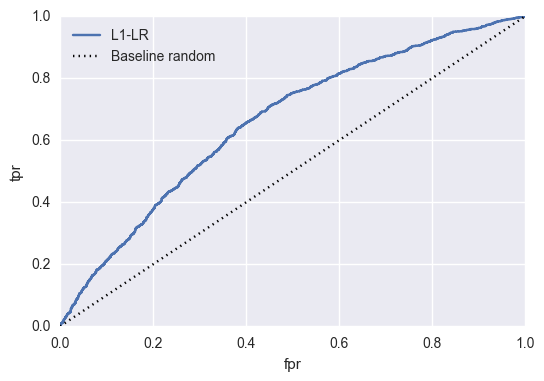

In [149]:
lr = linear_model.LogisticRegression(penalty = 'l1',C=1e50)
lr.fit(X_train_norm, y_train)
pred_lr_prob = lr.predict_proba(X_test_norm)

scores = model_selection.cross_val_score(lr,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, pred_lr_prob[:,1])
plt.plot(fpr_lr,tpr_lr, label='L1-LR')
plt.plot(fpr_lr,fpr_lr,'k:', label='Baseline random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

### w/ L2-regularization

AUC: 0.646 (+/- 0.015)


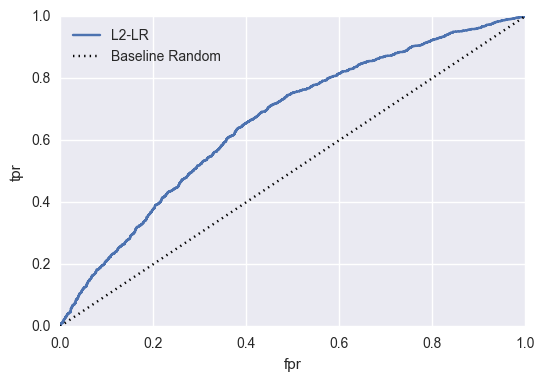

In [150]:
lr = linear_model.LogisticRegression(penalty = 'l2',C=1e50)
lr.fit(X_train_norm, y_train)
pred_lr_prob = lr.predict_proba(X_test_norm)

scores = model_selection.cross_val_score(lr,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, pred_lr_prob[:,1])
plt.plot(fpr_lr,tpr_lr, label='L2-LR')
plt.plot(fpr_lr,fpr_lr,'k:', label = 'Baseline Random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

## Naive Bayes
### w/ fit prior

AUC: 0.589 (+/- 0.011)


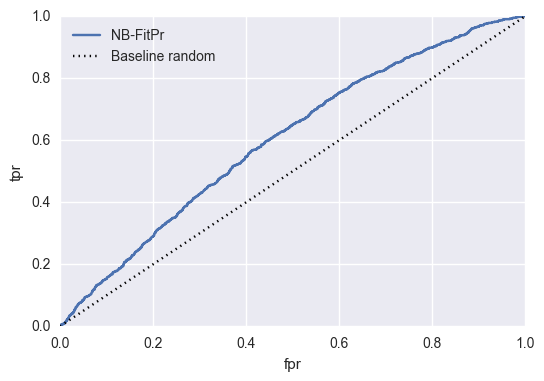

In [151]:
nb = BernoulliNB(alpha=1,fit_prior=True)
nb.fit(X_train_norm, y_train)
pred_nb_prob = nb.predict_proba(X_test_norm)

scores = model_selection.cross_val_score(nb,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

fpr_nb_fp, tpr_nb_fp, thresholds_nb_fp = metrics.roc_curve(y_test, pred_nb_prob[:,1])
plt.plot(fpr_nb_fp,tpr_nb_fp, label = 'NB-FitPr')
plt.plot(fpr_nb_fp,fpr_nb_fp,'k:', label='Baseline random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

### w/ uniform prior

AUC: 0.589 (+/- 0.011)


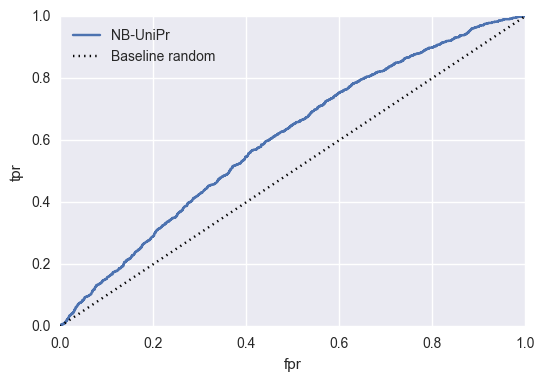

In [152]:
nb = BernoulliNB(alpha=1,fit_prior=False)
nb.fit(X_train_norm, y_train)
pred_nb_prob = nb.predict_proba(X_test_norm)

scores = model_selection.cross_val_score(nb,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

fpr_nb_up, tpr_nb_up, thresholds_nb_up = metrics.roc_curve(y_test, pred_nb_prob[:,1])
plt.plot(fpr_nb_up,tpr_nb_up, label='NB-UniPr')
plt.plot(fpr_nb_up,fpr_nb_up,'k:', label='Baseline random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

## Random Forest
### 200 trees

AUC: 0.679 (+/- 0.005)


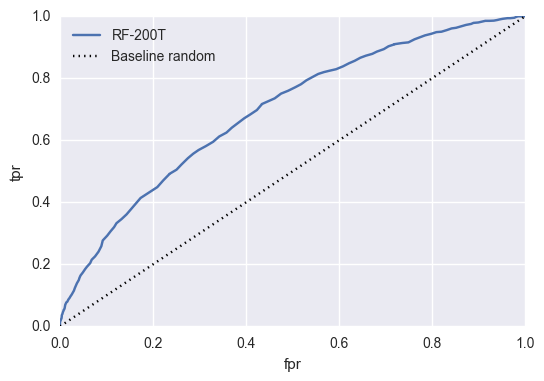

In [147]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=3)
rf.fit(X_train_norm, y_train)
pred_rf_prob = rf.predict_proba(X_test_norm)

scores_rf = model_selection.cross_val_score(rf,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores_rf.mean(), scores_rf.std() * 2))

fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, pred_rf_prob[:,1])
plt.plot(fpr_rf,tpr_rf, label='RF-200T')
plt.plot(fpr_rf,fpr_rf,'k:', label='Baseline random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

In [126]:
max_feats = [None, "sqrt", "log2"]

scores_rf = []
means = np.zeros(3)
stds = np.zeros(3)
for i in range(3):
    rf = RandomForestClassifier(n_jobs=3, n_estimators=100, max_features=max_feats[i])
    scores_rf.append(model_selection.cross_val_score(rf,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_rf[i].mean()
    stds[i] = scores_rf[i].std()

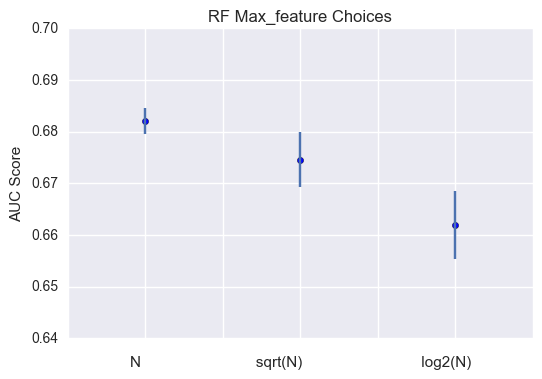

In [127]:
plt.scatter(np.arange(3),means)
plt.errorbar(np.arange(3),means,yerr=stds, ls=' ')
plt.xlabel('N                           sqrt(N)                            log2(N)')
plt.gca().set_xticklabels([])
plt.ylabel('AUC Score')
plt.title('RF Max_feature Choices')

In [133]:
n_est = np.array([80,100,125,150,200,250])
scores_rf = []
means = np.zeros(len(n_est))
stds = np.zeros(len(n_est))
for i in range(len(n_est)):
    rf = RandomForestClassifier(n_jobs=3, n_estimators=n_est[i], max_features=None)
    scores_rf.append(model_selection.cross_val_score(rf,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_rf[i].mean()
    stds[i] = scores_rf[i].std()

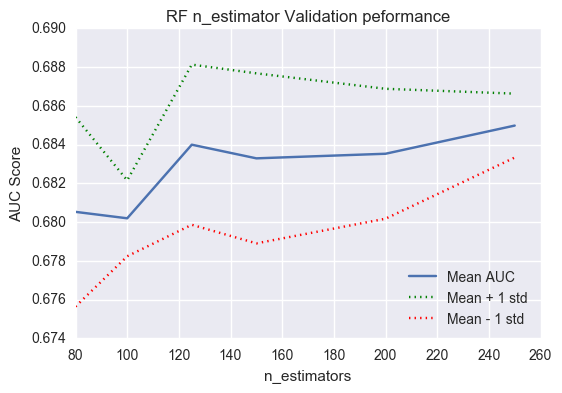

In [135]:
plt.plot(n_est, means, label='Mean AUC')
plt.plot(n_est, means+stds, 'g:', label='Mean + 1 std')
plt.plot(n_est, means-stds, 'r:', label='Mean - 1 std')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel('AUC Score')
plt.title('RF n_estimator Validation peformance')

### Gradient Boosting Classifier

AUC: 0.691 (+/- 0.012)


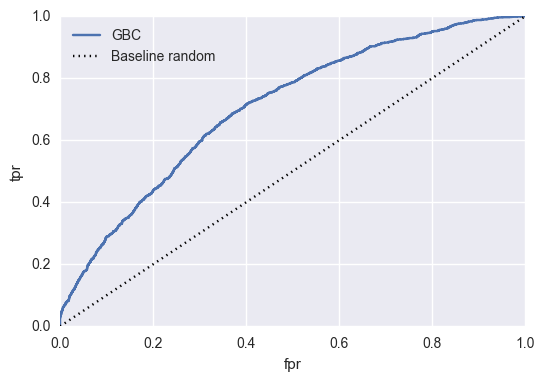

In [145]:
gbc = ensemble.GradientBoostingClassifier(subsample=0.4, max_features=None, n_estimators=120)
gbc.fit(X_train_norm, y_train)
pred_gbc_prob = gbc.predict_proba(X_test_norm)
fpr_gbc, tpr_gbc, thresholds_gbc = metrics.roc_curve(y_test, pred_gbc_prob[:,1])
scores_gbc = model_selection.cross_val_score(gbc,X_train_norm,y_train, cv=5, scoring='roc_auc')
print("AUC: %0.3f (+/- %0.3f)" % (scores_gbc.mean(), scores_gbc.std() * 2))
plt.plot(fpr_gbc,tpr_gbc, label='GBC')
plt.plot(fpr_gbc,fpr_gbc,'k:', label='Baseline random')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc=2)

Tuning bag fraction:

In [138]:
bag_frac = [0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
scores_gbc = []
means = np.zeros(len(bag_frac))
stds = np.zeros(len(bag_frac))
for i in range(len(bag_frac)):
    gbc = ensemble.GradientBoostingClassifier(subsample=bag_frac[i])
    scores_gbc.append(model_selection.cross_val_score(gbc,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_gbc[i].mean()
    stds[i] = scores_gbc[i].std()

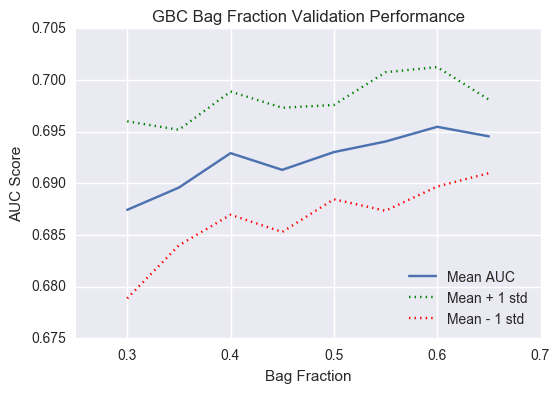

In [140]:
plt.plot(bag_frac, means, label='Mean AUC')
plt.plot(bag_frac, means+stds, 'g:', label='Mean + 1 std')
plt.plot(bag_frac, means-stds, 'r:', label='Mean - 1 std')
plt.legend(loc=4)
plt.xlabel('Bag Fraction')
plt.ylabel('AUC Score')
plt.title('GBC Bag Fraction Validation Performance')

#### Elbow occurs at roughly 0.5-0.6, if we use the 1 standard deviation rule our optimal fraction should be 0.4

Tuning Max feature choice

In [141]:
max_feats = [None, "sqrt", "log2"]
scores_gbc = []
means = np.zeros(3)
stds = np.zeros(3)
for i in range(3):
    gbc = ensemble.GradientBoostingClassifier(subsample=0.4, max_features=max_feats[i])
    scores_gbc.append(model_selection.cross_val_score(gbc,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_gbc[i].mean()
    stds[i] = scores_gbc[i].std()

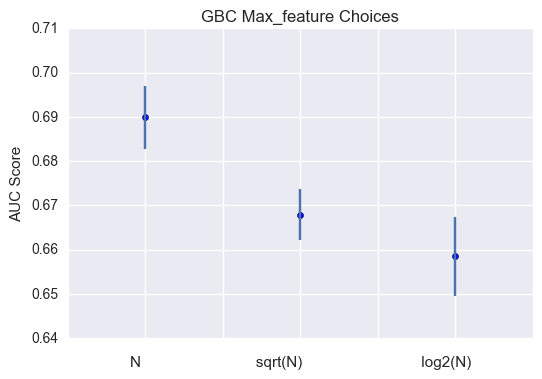

In [142]:
plt.scatter(np.arange(3),means)
plt.errorbar(np.arange(3),means,yerr=stds, ls=' ')
plt.xlabel('N                           sqrt(N)                            log2(N)')
plt.gca().set_xticklabels([])
plt.ylabel('AUC Score')
plt.title('GBC Max_feature Choices')

#### The default option of including all features is the clear winner in this case

In [143]:
n_est = np.array([80,100,125,150,200,250])
scores_gbc = []
means = np.zeros(len(n_est))
stds = np.zeros(len(n_est))
for i in range(len(n_est)):
    gbc = ensemble.GradientBoostingClassifier(subsample=0.4, max_features=None, n_estimators=n_est[i])
    scores_gbc.append(model_selection.cross_val_score(gbc,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_gbc[i].mean()
    stds[i] = scores_gbc[i].std()

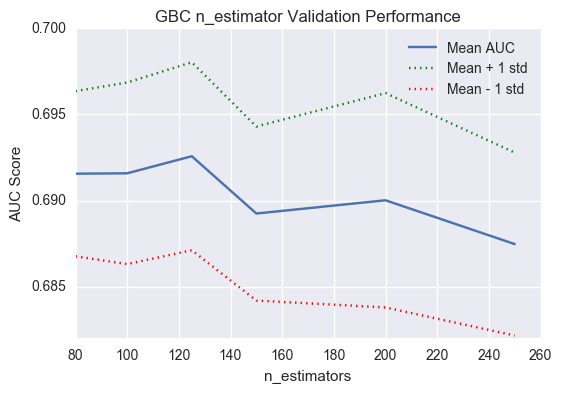

In [144]:
plt.plot(n_est, means, label='Mean AUC')
plt.plot(n_est, means+stds, 'g:', label='Mean + 1 std')
plt.plot(n_est, means-stds, 'r:', label='Mean - 1 std')
plt.legend(loc=4)
plt.xlabel('n_estimators')
plt.ylabel('AUC Score')
plt.title('GBC n_estimator Validation Performance')

#### Elbow appears to be roughly 150 estimators, with the 1 standard deviation rule telling up that 100 estimators should be optimal

In [154]:
loss_funs = ['deviance', 'exponential']
scores_gbc = []
means = np.zeros(len(loss_funs))
stds = np.zeros(len(loss_funs))
for i in range(len(loss_funs)):
    gbc = ensemble.GradientBoostingClassifier(subsample=0.4, max_features=120, loss=loss_funs[i])
    scores_gbc.append(model_selection.cross_val_score(gbc,X_train_norm,y_train, cv=5, scoring='roc_auc'))
    means[i] = scores_gbc[i].mean()
    stds[i] = scores_gbc[i].std()

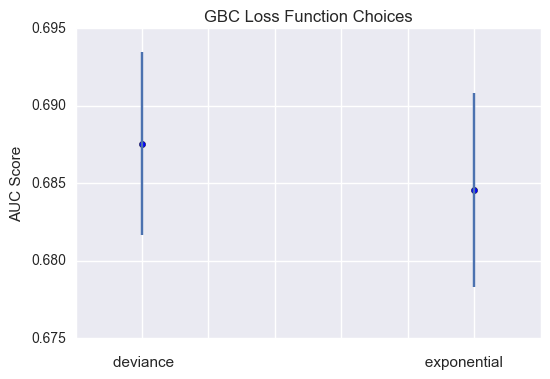

In [166]:
plt.errorbar(np.arange(len(loss_funs)),means,yerr=stds, ls=' ')
plt.scatter(np.arange(len(loss_funs)),means)
plt.xlabel('deviance                                                           exponential')
plt.gca().set_xticklabels([])
plt.ylabel('AUC Score')
plt.title('GBC Loss Function Choices')

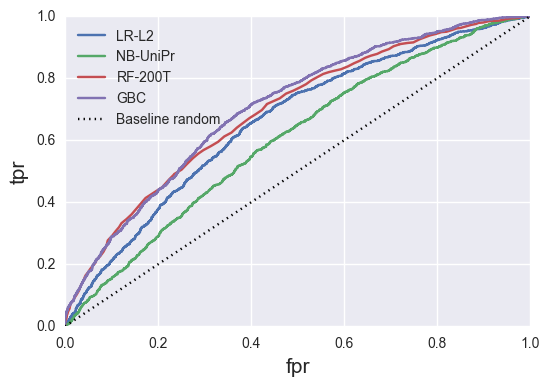

In [153]:
plt.plot(fpr_lr,tpr_lr, label='LR-L2')
plt.plot(fpr_nb_up,tpr_nb_up, label='NB-UniPr')
plt.plot(fpr_rf,tpr_rf, label='RF-200T')
plt.plot(fpr_gbc,tpr_gbc, label='GBC')
plt.plot(fpr_nb_up,fpr_nb_up,'k:', label='Baseline random')
plt.xlabel('fpr',fontsize=15)
plt.ylabel('tpr',fontsize=15)
#plt.title('ROC Curve Comparison', fontsize=18)
plt.legend(loc=2)
plt.savefig('ROC_Curves.png', format='png')

Random Forest with 200 Trees appears to be the clear winner when looking at the ROC curve. We can decide on a threshold for example by specifying that we want a true positive rate of at least 75% (i.e. we identify 75% of restaurants that will have 2+ violations).

In [167]:
target_tpr = 0.75
print('cutoff threshold for at least ' + str(100*target_tpr) + '% tpr: ' + str(thresholds_gbc[tpr_gbc > target_tpr][0]))
print('fpr at this threshold: ' + str(fpr_gbc[tpr_gbc > target_tpr][0]))

cutoff threshold for at least 75.0% tpr: 0.312721374893
fpr at this threshold: 0.446440677966


This tells us that if we were to investigate a restaurant flagged as at least 31.49% likely to have 2+ critical violations, we would correctly identify 75% of the offending restaurants while only having to visit 44% of the "clean" (1 or 0 critical violations) restaurants.

To get a general sense of how the model might perform in practice, we can assume that the average rates of 2+ critical violations in the dataset are a good approximation for the overall rates of 2+ violations for restaurants in NYC.

In [168]:
clean_prob = sklearn.metrics.accuracy_score(y_test, pred_zero)
print('fraction of restaurants that are "clean": ' + str(clean_prob))
dirty_prob = 1 - clean_prob

fraction of restaurants that are "clean": 0.661138502913


In [169]:

hyp_fpr = fpr_gbc[tpr_gbc > target_tpr][0]
hyp_tpr = tpr_gbc[tpr_gbc > target_tpr][0]

print('To find ' + "{0:.1f}".format((100*hyp_tpr),2) + '% of all "dirty" restaurants:')

fraction_investigated = clean_prob*hyp_fpr + dirty_prob*hyp_tpr
print('fraction of restaurants that will actually be investigated: ' + "{0:.1f}".format((100*fraction_investigated),2) + '%')

To find 75.1% of all "dirty" restaurants:
fraction of restaurants that will actually be investigated: 55.0%


So by prioritizing restaurants identified by the model, 75.1% of offending restaurants could be identified in just 55% of the time originally required.

### Extract confusion matrix entries

RF

In [82]:
print('On test set: ')
tn = (y_test == 0) & (pred_rf_prob[:,1] < thresholds_rf[tpr_rf > target_tpr][0])
fp = (y_test == 0) & (pred_rf_prob[:,1] >= thresholds_rf[tpr_rf > target_tpr][0])
fn = (y_test == 1) & (pred_rf_prob[:,1] < thresholds_rf[tpr_rf > target_tpr][0])
tp = (y_test == 1) & (pred_rf_prob[:,1] >= thresholds_rf[tpr_rf > target_tpr][0])
print('true positives: ' + str(tp.sum()))
print('true negatives: ' + str(tn.sum()))
print('false positives: ' + str(fp.sum()))
print('false negatives: ' + str(fn.sum()))

On test set: 
true positives: 1143
true negatives: 1531
false positives: 1419
false negatives: 369


GBC

In [111]:
print('On test set: ')
tn = (y_test == 0) & (pred_gbc_prob[:,1] < thresholds_gbc[tpr_gbc > target_tpr][0])
fp = (y_test == 0) & (pred_gbc_prob[:,1] >= thresholds_gbc[tpr_gbc > target_tpr][0])
fn = (y_test == 1) & (pred_gbc_prob[:,1] < thresholds_gbc[tpr_gbc > target_tpr][0])
tp = (y_test == 1) & (pred_gbc_prob[:,1] >= thresholds_gbc[tpr_gbc > target_tpr][0])
print('true positives: ' + str(tp.sum()))
print('true negatives: ' + str(tn.sum()))
print('false positives: ' + str(fp.sum()))
print('false negatives: ' + str(fn.sum()))

On test set: 
true positives: 1136
true negatives: 1644
false positives: 1306
false negatives: 376


Exporting the confusion matrix info w/ latlon

In [112]:
rating = pd.read_csv('combining features/Health_Insp_weather_loc_rating.csv', index_col=0)
rating = rating[['latitude','longitude']]
test_set = X_test.copy(deep=True)
test_set['target'] = y_test
test_set['prediction'] = (pred_rf_prob[:,1] >= thresholds_rf[tpr_rf > target_tpr][0])*1
test_set['true_positive'] = tp
test_set['true_negative'] = tn
test_set['false_positive'] = fp
test_set['false_negative'] = fn
test_set = test_set[['target','prediction','true_positive','true_negative','false_positive','false_negative']]
test_set = violations_df.merge(test_set,left_index=True,right_index=True)
test_set = test_set.merge(rating,left_index=True,right_index=True)
test_set.to_csv('GBC_testset_w_confusionmatrix.csv')

In [18]:
pred_rf_prob_train = rf.predict_proba(X_train_norm)
pred_rf_train = rf.predict(X_train_norm)
print('On training set: ')
tn_train = (y_train == 0) & (pred_rf_prob_train[:,1] < thresholds_rf[tpr_rf > target_tpr][0])
fp_train = (y_train == 0) & (pred_rf_prob_train[:,1] >= thresholds_rf[tpr_rf > target_tpr][0])
fn_train = (y_train == 1) & (pred_rf_prob_train[:,1] < thresholds_rf[tpr_rf > target_tpr][0])
tp_train = (y_train == 1) & (pred_rf_prob_train[:,1] >= thresholds_rf[tpr_rf > target_tpr][0])
print('true positives: ' + str(tp_train.sum()))
print('true negatives: ' + str(tn_train.sum()))
print('false positives: ' + str(fp_train.sum()))
print('false negatives: ' + str(fn_train.sum()))

print('Accuracy: ' + str(metrics.accuracy_score(y_train, pred_rf_train)))


On training set: 
true positives: 6192
true negatives: 11651
false positives: 2
false negatives: 0
Accuracy: 0.999943961894
